# Day 18/19: Water/Island

Minor extension of Day 8 (Blue) to superimpose shapefile data.

## Configuration

In [1]:
import os
import geopandas as gpd
import pygmt
import numpy as np
import math

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Choose bounding box of interest

# Australia
place = "AUS"
lons = [105, 165]
lats = [-45, -5]

# Papua New Guinea
place = "PNG"
lons = [140, 160]
lats = [-15, 0]

## Global Distribution of Coral Reefs

Downloaded from [UN World Conservation Monitoring Centre (UNEP-WCMC)](https://data.unep-wcmc.org/datasets/1)

UNEP-WCMC, WorldFish Centre, WRI, TNC (2021). Global distribution of warm-water coral reefs, compiled from multiple sources including the Millennium Coral Reef Mapping Project. Version 4.1. Includes contributions from IMaRS-USF and IRD (2005), IMaRS-USF (2005) and Spalding et al. (2001). Cambridge (UK): UN Environment World Conservation Monitoring Centre. Data DOI: https://doi.org/10.34892/t2wk-5t34

In [3]:
# Map to path
poly_file = "WCMC008_CoralReef2018_Py_v4_1.shp"
reef_folder = os.path.join("..", "data", "etc", "unep-wcmc", "01_Data")
poly_path = os.path.join(reef_folder, poly_file)

# Read file
reef_poly = gpd.read_file(poly_path)

# Preview
reef_poly.head(5)

,LAYER_NAME,METADATA_I,ORIG_NAME,FAMILY,GENUS,SPECIES,DATA_TYPE,START_DATE,END_DATE,DATE_TYPE,VERIF,NAME,LOC_DEF,SURVEY_MET,GIS_AREA_K,Shape_Leng,Shape_Area,REP_AREA_K,geometry
0,CRR,1.0,Not Reported,Not Reported,Not Reported,Not Reported,Not Reported,Not Reported,Not Reported,ND,Not Reported,Not Reported,Coral line buffered to 300m,Not Reported,5.059916,0.152948,0.000420,Not Reported,"POLYGON ((46.47551 -11.97419, 46.47851 -11.978..."
1,CRR,1.0,Not Reported,Not Reported,Not Reported,Not Reported,Not Reported,Not Reported,Not Reported,ND,Not Reported,Not Reported,Coral line buffered to 300m,Not Reported,5.450101,0.164919,0.000453,Not Reported,"POLYGON ((46.21811 -12.21430, 46.22181 -12.218..."
2,CRR,1.0,Not Reported,Not Reported,Not Reported,Not Reported,Not Reported,Not Reported,31/12/2009,-Y,Not Reported,Not Reported,coral,Not Reported,32.351025,1.079098,0.002664,Not Reported,"MULTIPOLYGON (((142.82287 -9.67503, 142.81353 ..."
3,CRR,1.0,Not Reported,Not Reported,Not Reported,Not Reported,Not Reported,Not Reported,Not Reported,ND,Not Reported,Not Reported,coral,Not Reported,1.823247,0.066740,0.000159,Not Reported,"POLYGON ((36.90715 21.98134, 36.89960 21.98446..."
4,CRR,1.0,Not Reported,Not Reported,Not Reported,Not Reported,Not Reported,Not Reported,Not Reported,ND,Not Reported,Not Reported,coral,Not Reported,34.815939,1.171056,0.003047,Not Reported,"MULTIPOLYGON (((36.93400 21.98049, 36.93382 21..."


## Create map using PyGMT

grdblend [NOTICE]: Remote data courtesy of GMT data server OCEANIA [https://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: Earth Relief at 30x30 arc seconds from Gaussian Cartesian filtering (1.0 km fullwidth) of SRTM15+V2.1 [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 15x15 degree grid tile (earth_relief_30s_p): S15E135


Min elevation -9088.0; Max elevation 0.0
Plotting contours on range: [-9100 -8400 -7700 -7000 -6300 -5600 -4900 -4200 -3500 -2800 -2100 -1400
  -700]


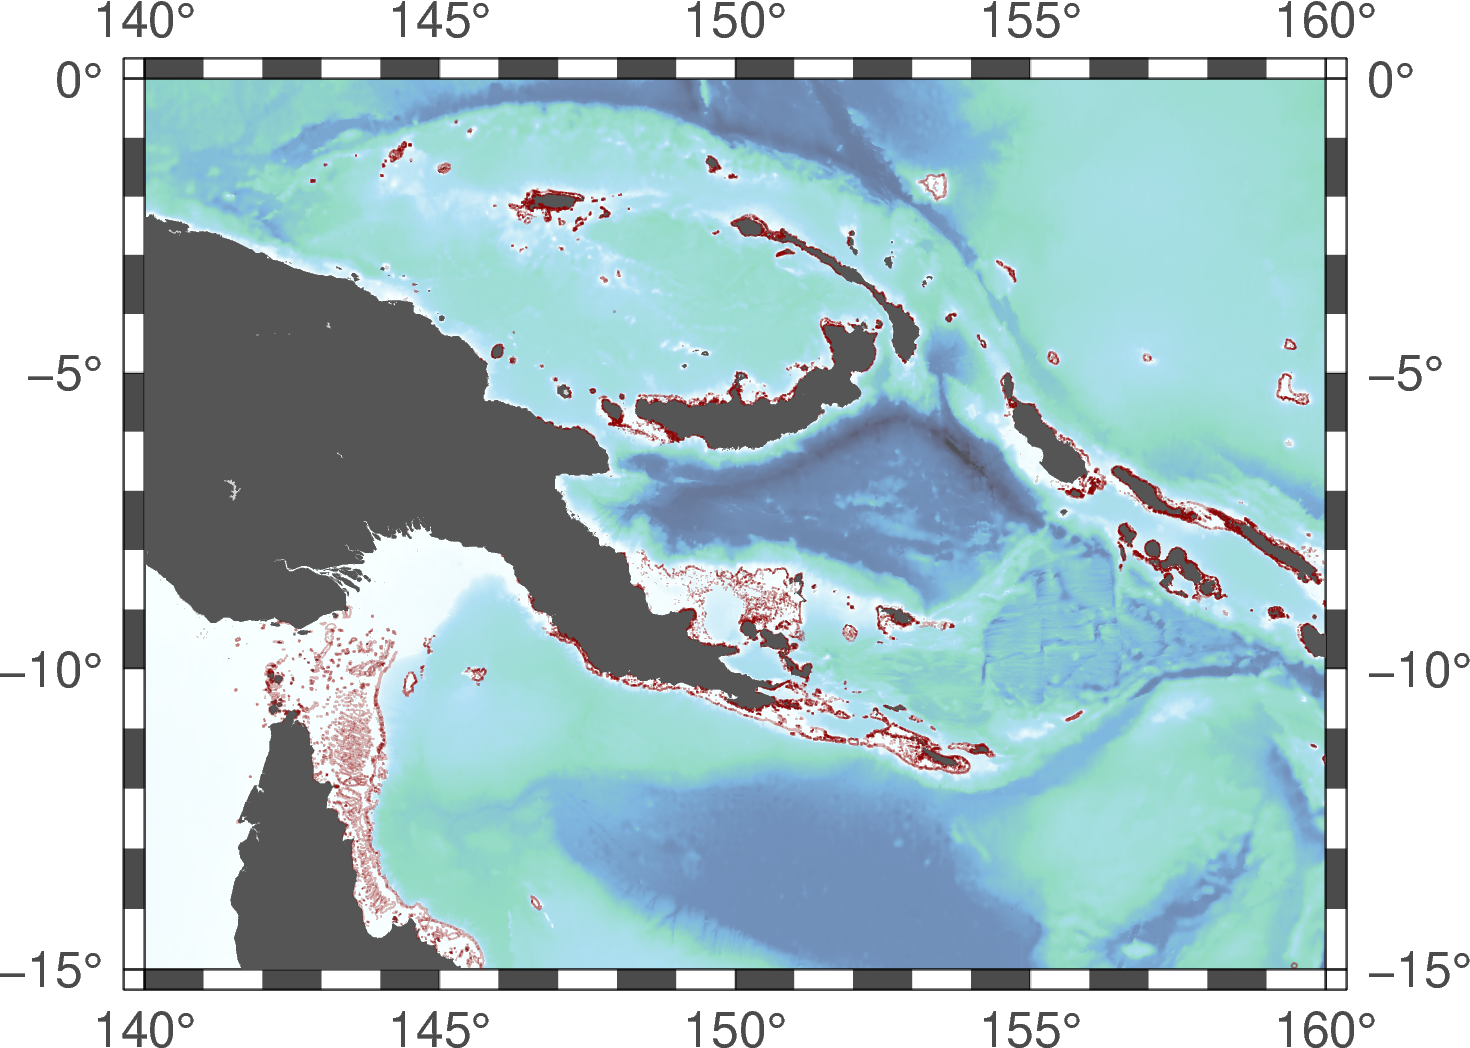

In [4]:
# Set the region for the plot to be slightly larger than the data bounds.
region = [
    lons[0],
    lons[1],
    lats[0],
    lats[1],
]

# Load sample earth relief data
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)

# Mask land values
grid.values[grid.values > 0] = float('nan')
print(f"Min elevation {float(grid.min())}; Max elevation {float(grid.max())}")

# Round up to nearest 100
def roundup(x):
    return int(math.ceil(x / 100.0)) * 100

# Get elevation range values
start = -1*roundup(abs(float(grid.min())))
stop = 0
n = 15
incr = roundup(abs(start)/n)
grid_range = np.arange(start, stop, incr)
n_range = grid_range.shape[0] - 1
print(f"Plotting contours on range: {grid_range}")

# Construct plot
fig = pygmt.Figure()

# Background
fig.grdimage(
    grid=grid,
    cmap="bathy",
    projection="M10c",
    frame=True,
    transparency=30,
)

# Add coastlines
fig.coast(land="#555555", projection="M10c")

# Add reef data
fig.plot(data=poly_path, pen="darkred", transparency=70)

# Save figure
out_folder = os.path.join("..", "contributions")
out_file = f"18-19_{place}.png"
out_path = os.path.join(out_folder, out_file)
fig.savefig(out_path, dpi=300)

# Show figure
fig.show()